## 1. Importing the required Libraries

In [176]:
# import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## 2. Reading the data into a Data Frame

In [3]:
# Read the data file into Data Frame
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Data quality checks

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As can be seen above the data types of attributes are appropriate. So the data must be in proper format. 
### The data types of the columns temp, atemp,hum,windspeed, casual, registered, cnt are appropriate. This shows that those columns have proper/relevant values. 
### Below describe statment will check the maximum and minimun values to see if any variable has any anamoly.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### As can be seen above the max , min values for columns like season, year, mnth, holiday, weekday, workingday, weathersit are correct.
### By checking the min,25%,50%,75% and max values of the columns. It can be concluded that there are no outliers. 
### Below we will check for Null values.

In [10]:
# Check Null values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### As can be seen above data does not have Null values.

### Below we will check the individual values in columns to see if there are any invalid values.

In [12]:
# Check the values of categorical variables 
print(day_df.season.value_counts())
print(day_df.yr.value_counts())
print(day_df.mnth.value_counts())
print(day_df.holiday.value_counts())
print(day_df.weekday.value_counts())
print(day_df.workingday.value_counts())
print(day_df.weathersit.value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


### As can be seen above all the categorical variables have proper values.

In [14]:
# Check the date column dteday by trying convert the data into date
dteday_df = pd.DataFrame(columns=['dteday','is_date'])
dteday_df['dteday'] = day_df['dteday']
dteday_df['is_date'] = pd.to_datetime(day_df.dteday, format='%d-%m-%Y', errors='coerce').notna()
print(dteday_df[dteday_df['is_date']== False])
print(dteday_df[dteday_df['is_date']== True].dteday.count())

Empty DataFrame
Columns: [dteday, is_date]
Index: []
730


### As can be seen above all the values in the column dteday are in proper format.

## 4. Drop the columns 'daydte','instant' and casual,registered as these columns would not be useful for the analysis.

In [16]:
day_df.shape

(730, 16)

In [18]:
# Droping the useless column 'instant'
day_df.drop(columns=['dteday','instant','casual','registered'], inplace = True)

In [20]:
day_df.shape

(730, 12)

In [22]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## 5. Data Transformation - Handling Categorical variables

In [24]:
# Create variables which have the dictionary which mappings the numerical values to its categorical string value
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
mnth_map = {1:'january', 2:'february', 3:'march', 4:'april', 5:'may', 6:'june',
            7:'july', 8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}
weekday_map = {6:'monday', 0:'tuesday', 1:'wednesday', 2:'thursday', 3:'friday', 
               4:'saturday', 5:'sunday'}
# Below names are created by using the initial part of the four given weathersit 
weathersit_map = {1:'clear',2:'mist_cloudy',3:'light_snow',4:'heavy_rain'}

In [26]:
# use above variables and map the numerical values to its categorical string value
day_df.season = day_df.season.map(season_map)
day_df.mnth = day_df.mnth.map(mnth_map)
day_df.weekday = day_df.weekday.map(weekday_map)
day_df.weathersit = day_df.weathersit.map(weathersit_map)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 6. EDA - Exploratory data Analysis

### Below we will do some basic Exploratory Data Analysis using pair plot, heat map and box plot.

In [30]:
day_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


<Figure size 10000x10000 with 0 Axes>

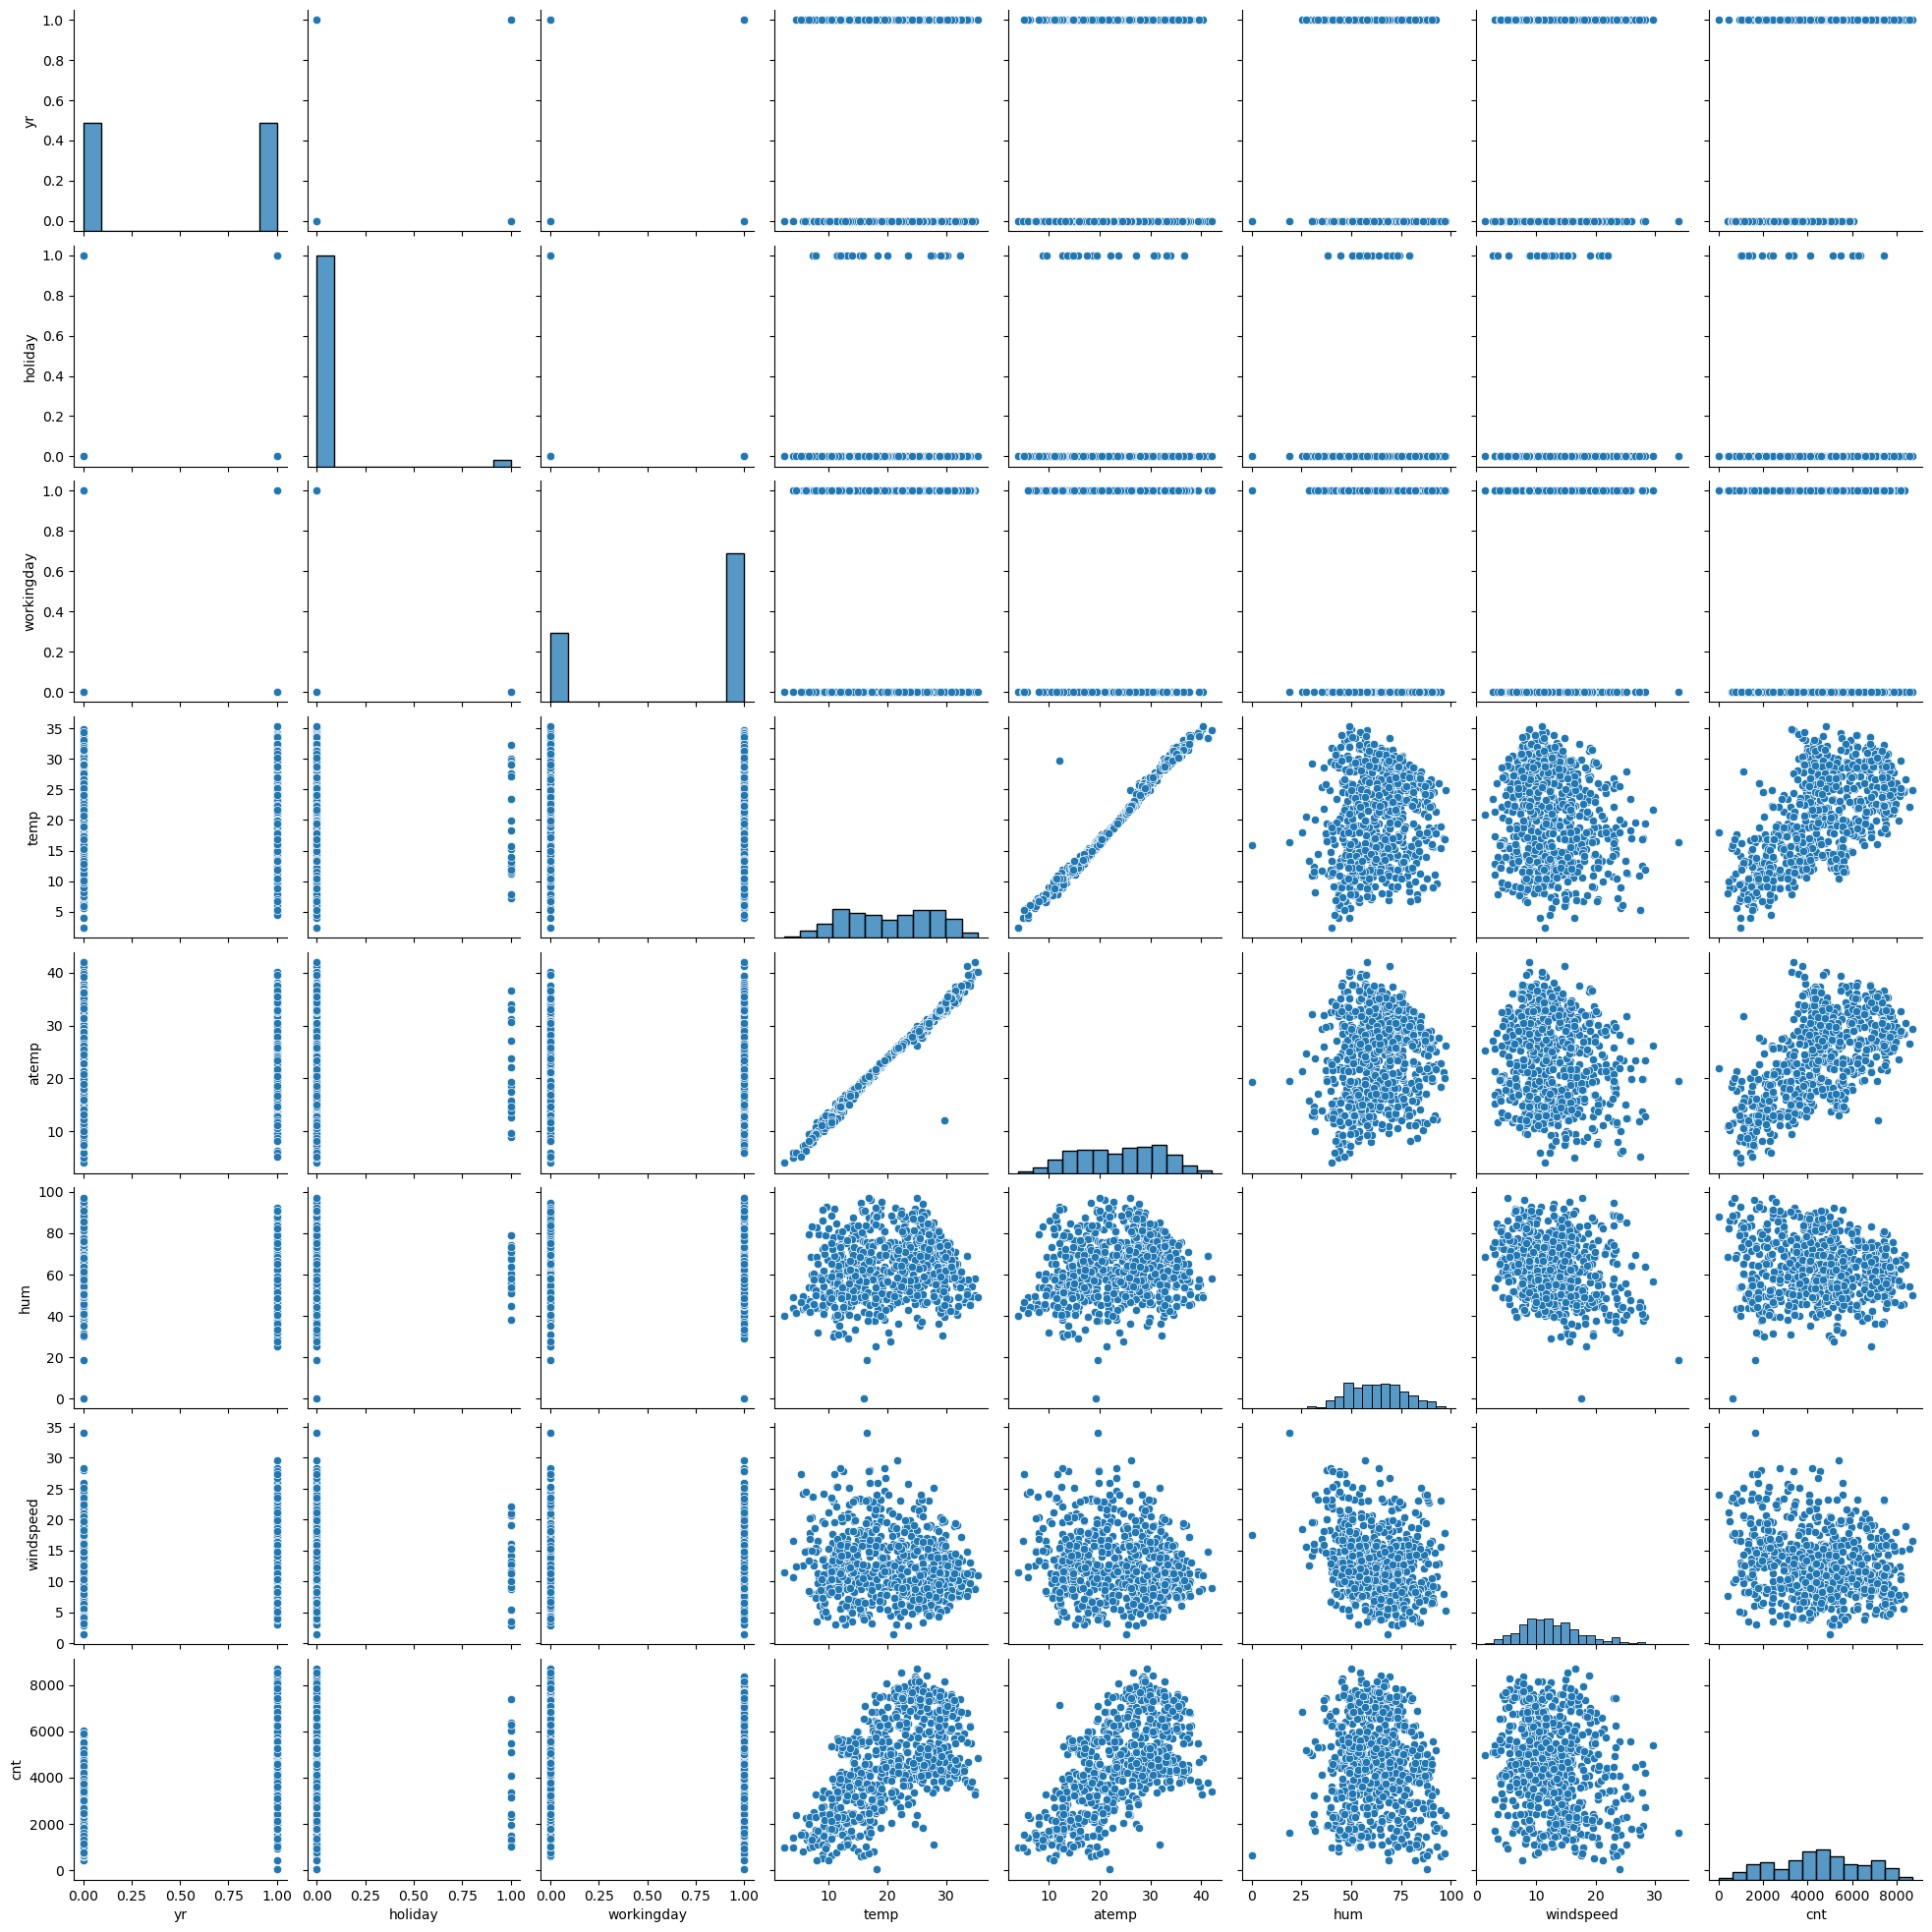

In [32]:
# draw the graphs to visualize relationships between various variables
plt.figure(figsize=(100,100))
sns.pairplot(day_df)
plt.show()

#### From above graps it can be clearly seen that the variables temp and atemp are both correlated and one of them
#### is redundant. So it seems that it would be ok to just have one of them for analysis and model creation.
#### From last line of above graphs, below observations can be made.
#### a.) In 2019 there are more (as compared to 2018) bookings for the bikes and high counts.
#### b.) Holidays have low booking of bikes.
#### c.) Non working days touch slightly higher counts though data points seems to be little more for working days.
#### d.) As the temperature increases we see more data points and high counts.

In [36]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

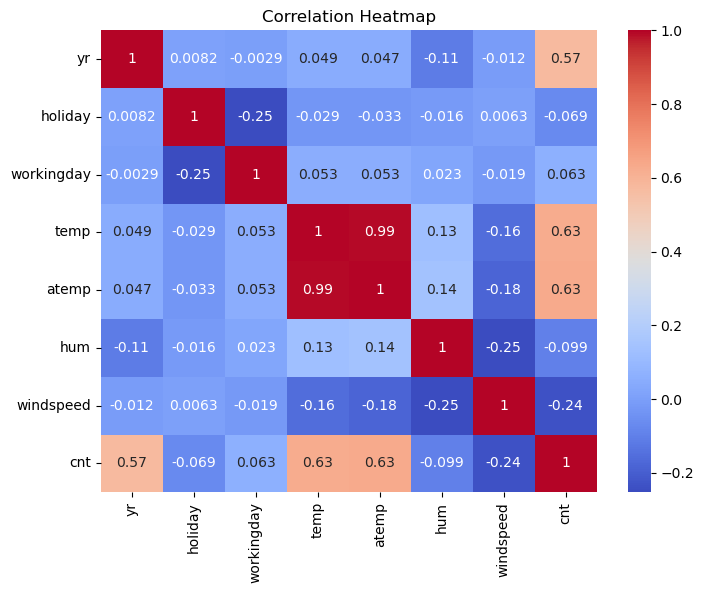

In [38]:
# Draw the HeatMap to check the basic correlation among various variables
plt.figure(figsize=(8, 6))
corr_matrix = day_df[['yr', 'holiday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### From above HeatMap, below observations can be made.
#### a.) temp and atemp are highly correlated. One can be removed from the data set before model creation.
#### b.) temp/atemp and count also have high correlation.
#### c.) Yr also have significant correlation with cnt.

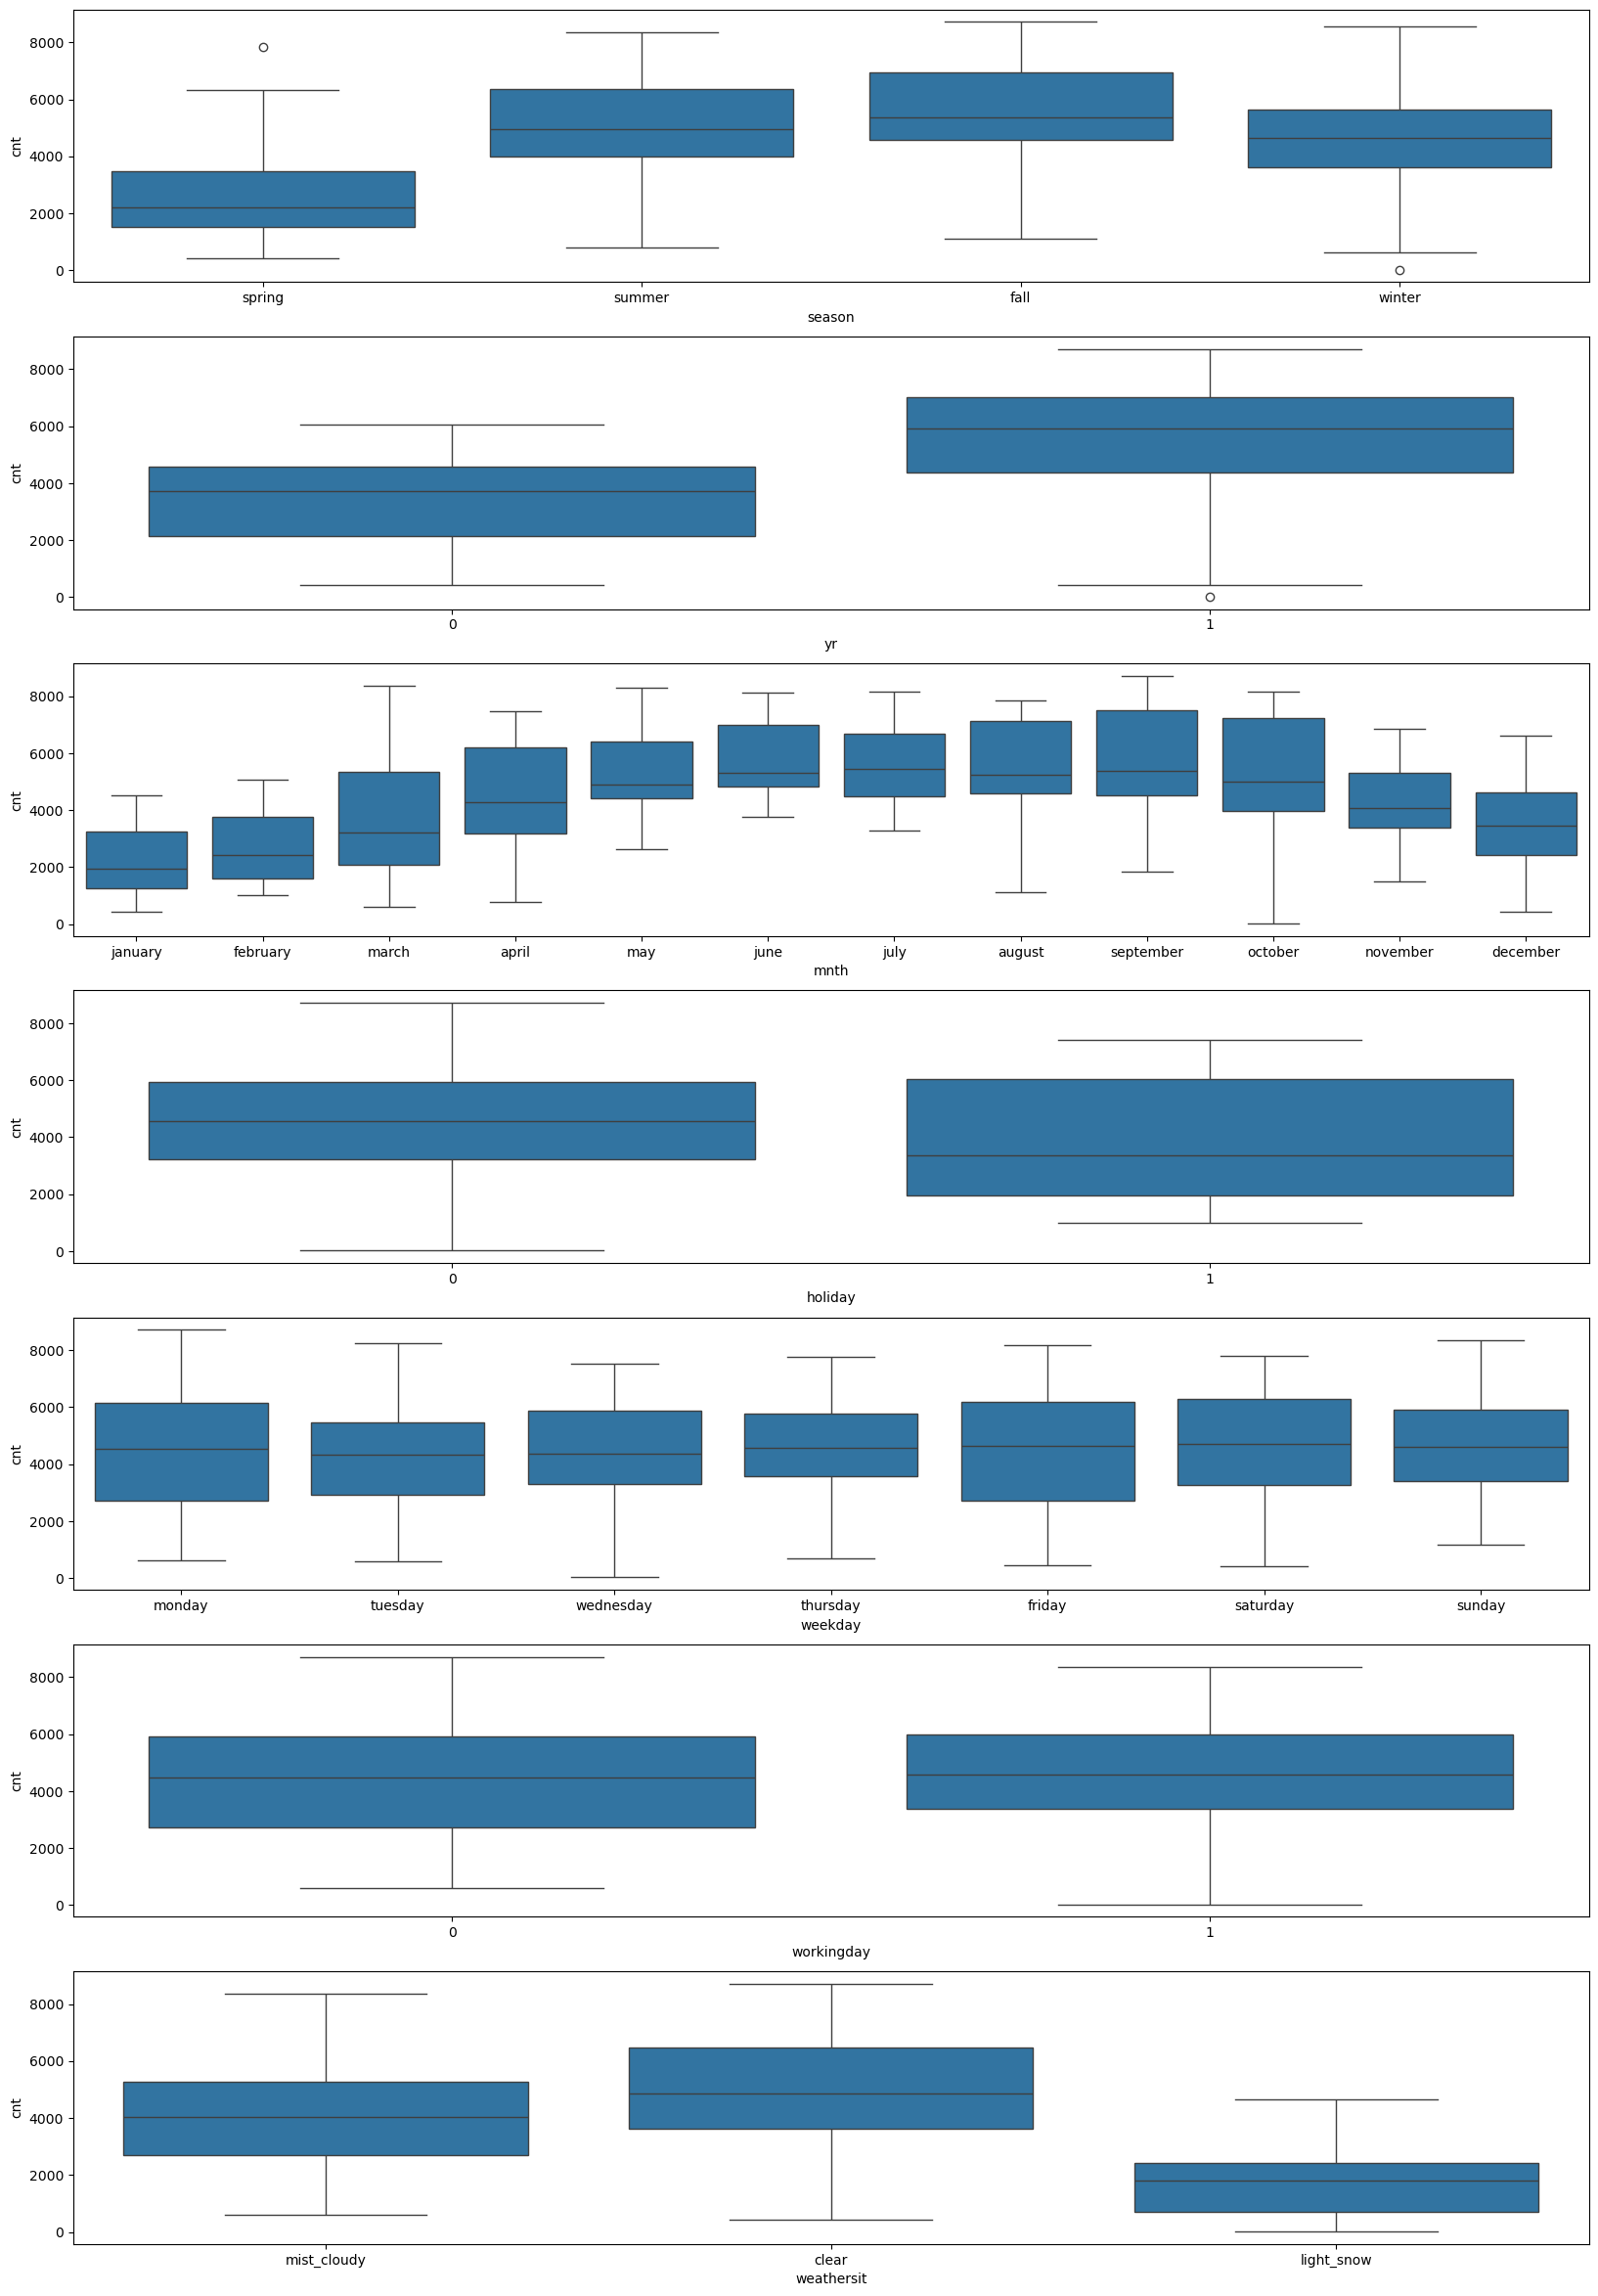

In [34]:
# Draw the box plot for categorical variables.
plt.figure(figsize=(20,34))

plt.subplot(8,1,1)
sns.boxplot(x='season',y='cnt',data=day_df)
plt.subplot(8,1,2)
sns.boxplot(x='yr',y='cnt',data=day_df)
plt.subplot(8,1,3)
sns.boxplot(x='mnth',y='cnt',data=day_df)
plt.subplot(8,1,4)
sns.boxplot(x='holiday',y='cnt',data=day_df)
plt.subplot(8,1,5)
sns.boxplot(x='weekday',y='cnt',data=day_df)
plt.subplot(8,1,6)
sns.boxplot(x='workingday',y='cnt',data=day_df)
plt.subplot(8,1,7)
sns.boxplot(x='weathersit',y='cnt',data=day_df)
plt.show()

#### Below observations can be made from above box plots.
#### a.) Summer and Fall season shows high booking counts, where as Spring season shows lowest count.
#### b.) Year 2019 shows high counts
#### c.) 6 Months from May to October shows high counts.
#### d.) When Holiday = 0, that is the day is not a holiday then counts are high as compared to when it's a holiday.
#### e.) Weekday and workingday don't seem to have clear impact on counts.
#### f.) For bad weather we dont have any data, because there may not be bookings on those days
#### (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) - This is bad weather which shows no booking.
#### Next level of bad weather shows lowest counts.
#### (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) - This shows lowest count among three weather  types for which data ia available.
#### Below best weather shows highest booking counts.
#### (Clear, Few clouds, Partly cloudy, Partly cloudy) - This shows the highest booking counts. 

## 7. Dummy Variables

In [42]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [44]:
# creating dummy variables 
variables_dummy = pd.get_dummies(day_df[['season','mnth','weekday','weathersit']], drop_first = True)
variables_dummy.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
variables_dummy.shape

(730, 22)

In [48]:
variables_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   season_spring           730 non-null    bool 
 1   season_summer           730 non-null    bool 
 2   season_winter           730 non-null    bool 
 3   mnth_august             730 non-null    bool 
 4   mnth_december           730 non-null    bool 
 5   mnth_february           730 non-null    bool 
 6   mnth_january            730 non-null    bool 
 7   mnth_july               730 non-null    bool 
 8   mnth_june               730 non-null    bool 
 9   mnth_march              730 non-null    bool 
 10  mnth_may                730 non-null    bool 
 11  mnth_november           730 non-null    bool 
 12  mnth_october            730 non-null    bool 
 13  mnth_september          730 non-null    bool 
 14  weekday_monday          730 non-null    bool 
 15  weekday_saturday       

In [50]:
# To get 1 for True and 0 for False, conver to integer data type
variables_dummy = variables_dummy.astype('int')
variables_dummy.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Add the dummy variables to day_df
day_df = pd.concat([day_df, variables_dummy], axis = 1)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
0,spring,0,january,0,monday,0,mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,0,mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [54]:
day_df.shape

(730, 34)

In [56]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [58]:
# Remove the categorical variables 'season','mnth','weekday','weathersit' from day_df
day_df.drop(columns=['season','mnth','weekday','weathersit'], inplace = True)
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [60]:
day_df.shape

(730, 30)

## 8. Splitting the Data into Training and Testing Sets

In [62]:
df_train, df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## 9. Rescaling the Features

In [64]:
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [70]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 10. Dividing into X and Y sets for the model building

In [72]:
y_train = df_train.pop('cnt')
X_train = df_train

## 11. Building the Model

### 11.1 Feature selection using RFE

In [74]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Implementing RFE
rfe = RFE(estimator=lm, n_features_to_select=19)          
rfe = rfe.fit(X_train, y_train)

In [76]:
# List of features with their selection status and ranking
feature_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Sort features by their ranking (ascending order, 1 is the best rank)
sorted_feature_ranking = sorted(feature_ranking, key=lambda x: x[2])
sorted_feature_ranking

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_december', True, 1),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_november', True, 1),
 ('mnth_september', True, 1),
 ('weekday_monday', True, 1),
 ('weekday_tuesday', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist_cloudy', True, 1),
 ('atemp', False, 2),
 ('mnth_may', False, 3),
 ('mnth_august', False, 4),
 ('weekday_wednesday', False, 5),
 ('weekday_thursday', False, 6),
 ('weekday_sunday', False, 7),
 ('mnth_october', False, 8),
 ('weekday_saturday', False, 9),
 ('mnth_june', False, 10),
 ('mnth_march', False, 11)]

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_december',
       'mnth_february', 'mnth_january', 'mnth_july', 'mnth_november',
       'mnth_september', 'weekday_monday', 'weekday_tuesday',
       'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

### 11.2 Building model using statsmodel, for the detailed statistics

## Iteration 1 - 

In [82]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
# Executing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [88]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_february,mnth_january,mnth_july,mnth_november,mnth_september,weekday_monday,weekday_tuesday,weathersit_light_snow,weathersit_mist_cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1,0,0,1


In [90]:
# summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.55e-190
Time:                        19:49:23   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2396      0.030      8.120      0.000       0.182       0.298
yr                         0.2311      0.008     29.082      0.000       0.215       0.247
holiday                   -0.0022      0.022     -0.102      0.919      -0.045       0.040
workingday                 0.0921      0.010      9.378      0.000       0.073       0.111
temp                       0.4598      0.038     12.233      0.000       0.386       0.534
hum                       -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed                 -0.1887      0.025     -7.440      0.000      -0.239      -0.139
season_spring             -0.0518      0.022     -2.390      0.017      -0.094      -0.009
season_summer              0.0377      0.015      2.483      0.013       0.008       0.068
season_winter              0.1035      0.018      5.852      0.000       0.069       0.138
mnth_december             -0.0491      0.018     -2.727      0.007      -0.085      -0.014
mnth_february             -0.0339      0.021     -1.591      0.112      -0.076       0.008
mnth_january              -0.0640      0.021     -3.025      0.003      -0.106      -0.022
mnth_july                 -0.0517      0.018     -2.883      0.004      -0.087      -0.016
mnth_november             -0.0465      0.019     -2.499      0.013      -0.083      -0.010
mnth_september             0.0718      0.017      4.319      0.000       0.039       0.104
weekday_monday             0.1020      0.012      8.667      0.000       0.079       0.125
weekday_tuesday            0.0477      0.012      3.883      0.000       0.024       0.072
weathersit_light_snow     -0.2583      0.026     -9.924      0.000      -0.309      -0.207
weathersit_mist_cloudy    -0.0600      0.010     -5.813      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                     6.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 2 - 

In [96]:
# Removing 'holiday' from the data set as it has very high p value of 0.919
col = col.drop('holiday')
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_february',
       'mnth_january', 'mnth_july', 'mnth_november', 'mnth_september',
       'weekday_monday', 'weekday_tuesday', 'weathersit_light_snow',
       'weathersit_mist_cloudy'],
      dtype='object')

In [98]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[col]

In [100]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [102]:
# Executing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [104]:
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_february,mnth_january,mnth_july,mnth_november,mnth_september,weekday_monday,weekday_tuesday,weathersit_light_snow,weathersit_mist_cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1,0,0,1


In [106]:
# summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.55e-190
Time:                        19:57:27   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2374      0.044      5.335      0.000       0.150       0.325
yr                         0.2311      0.008     29.082      0.000       0.215       0.247
workingday                 0.0943      0.025      3.722      0.000       0.045       0.144
temp                       0.4598      0.038     12.233      0.000       0.386       0.534
hum                       -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed                 -0.1887      0.025     -7.440      0.000      -0.239      -0.139
season_spring             -0.0518      0.022     -2.390      0.017      -0.094      -0.009
season_summer              0.0377      0.015      2.483      0.013       0.008       0.068
season_winter              0.1035      0.018      5.852      0.000       0.069       0.138
mnth_december             -0.0491      0.018     -2.727      0.007      -0.085      -0.014
mnth_february             -0.0339      0.021     -1.591      0.112      -0.076       0.008
mnth_january              -0.0640      0.021     -3.025      0.003      -0.106      -0.022
mnth_july                 -0.0517      0.018     -2.883      0.004      -0.087      -0.016
mnth_november             -0.0465      0.019     -2.499      0.013      -0.083      -0.010
mnth_september             0.0718      0.017      4.319      0.000       0.039       0.104
weekday_monday             0.1042      0.027      3.886      0.000       0.051       0.157
weekday_tuesday            0.0499      0.027      1.857      0.064      -0.003       0.103
weathersit_light_snow     -0.2583      0.026     -9.924      0.000      -0.309      -0.207
weathersit_mist_cloudy    -0.0600      0.010     -5.813      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Iteration 3 - 

In [108]:
# Removing 'mnth_february' from the data set as it has high p-value 0.112
col = col.drop('mnth_february')
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weekday_monday',
       'weekday_tuesday', 'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [110]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[col]

In [112]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [114]:
# Executing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [116]:
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_january,mnth_july,mnth_november,mnth_september,weekday_monday,weekday_tuesday,weathersit_light_snow,weathersit_mist_cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0,0,1


In [118]:
# summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          9.55e-191
Time:                        19:59:13   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2239      0.044      5.118      0.000       0.138       0.310
yr                         0.2308      0.008     29.005      0.000       0.215       0.246
workingday                 0.0966      0.025      3.812      0.000       0.047       0.146
temp                       0.4750      0.036     13.038      0.000       0.403       0.547
hum                       -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed                 -0.1876      0.025     -7.388      0.000      -0.237      -0.138
season_spring             -0.0611      0.021     -2.925      0.004      -0.102      -0.020
season_summer              0.0409      0.015      2.708      0.007       0.011       0.071
season_winter              0.1052      0.018      5.949      0.000       0.070       0.140
mnth_december             -0.0405      0.017     -2.351      0.019      -0.074      -0.007
mnth_january              -0.0458      0.018     -2.570      0.010      -0.081      -0.011
mnth_july                 -0.0526      0.018     -2.932      0.004      -0.088      -0.017
mnth_november             -0.0420      0.018     -2.277      0.023      -0.078      -0.006
mnth_september             0.0732      0.017      4.404      0.000       0.041       0.106
weekday_monday             0.1070      0.027      3.997      0.000       0.054       0.160
weekday_tuesday            0.0520      0.027      1.933      0.054      -0.001       0.105
weathersit_light_snow     -0.2571      0.026     -9.865      0.000      -0.308      -0.206
weathersit_mist_cloudy    -0.0598      0.010     -5.781      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Iteration 4 - 

In [120]:
# Removing 'weekday_tuesday' from the data set as it has slightly high p-value
col = col.drop('weekday_tuesday')
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weekday_monday',
       'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [122]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[col]

In [124]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [126]:
# Executing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [128]:
X_train_rfe.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_january,mnth_july,mnth_november,mnth_september,weekday_monday,weathersit_light_snow,weathersit_mist_cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0,1


In [132]:
# summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          4.53e-191
Time:                        20:12:34   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2694      0.037      7.286      0.000       0.197       0.342
yr                         0.2310      0.008     28.956      0.000       0.215       0.247
workingday                 0.0522      0.011      4.847      0.000       0.031       0.073
temp                       0.4729      0.037     12.953      0.000       0.401       0.545
hum                       -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed                 -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring             -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer              0.0406      0.015      2.683      0.008       0.011       0.070
season_winter              0.1052      0.018      5.935      0.000       0.070       0.140
mnth_december             -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_january              -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_july                 -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_november             -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_september             0.0708      0.017      4.263      0.000       0.038       0.103
weekday_monday             0.0627      0.014      4.513      0.000       0.035       0.090
weathersit_light_snow     -0.2568      0.026     -9.826      0.000      -0.308      -0.205
weathersit_mist_cloudy    -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF(Variance Inflation Factor) calculation for checking Multicollinearity issues ------

In [134]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_december',
       'mnth_january', 'mnth_july', 'mnth_november', 'mnth_september',
       'weekday_monday', 'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [136]:
# creating a data set without 'const'
X_train_rfe_new = X_train_rfe.drop(['const'], axis=1)

In [138]:
# Calculating VIF taking the columns of the iteration 1 model data set
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.86
15,weathersit_mist_cloudy,2.32
0,yr,2.09
13,weekday_monday,1.86


## Iteration 5 - 

In [140]:
# Removing 'hum' from the data set based on very high VIF score of 31.14
col = col.drop('hum')
col

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weekday_monday',
       'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [142]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[col]

In [144]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [146]:
# Executing the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [148]:
X_train_rfe.head()

,const,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_december,mnth_january,mnth_july,mnth_november,mnth_september,weekday_monday,weathersit_light_snow,weathersit_mist_cloudy
653,1.0,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0,1


In [150]:
# summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          5.71e-189
Time:                        20:37:31   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1999      0.033      6.084      0.000       0.135       0.264
yr                         0.2346      0.008     29.196      0.000       0.219       0.250
workingday                 0.0548      0.011      5.027      0.000       0.033       0.076
temp                       0.4344      0.036     12.184      0.000       0.364       0.504
windspeed                 -0.1610      0.025     -6.479      0.000      -0.210      -0.112
season_spring             -0.0717      0.021     -3.394      0.001      -0.113      -0.030
season_summer              0.0338      0.015      2.219      0.027       0.004       0.064
season_winter              0.0919      0.018      5.209      0.000       0.057       0.127
mnth_december             -0.0483      0.017     -2.778      0.006      -0.083      -0.014
mnth_january              -0.0528      0.018     -2.924      0.004      -0.088      -0.017
mnth_july                 -0.0469      0.018     -2.575      0.010      -0.083      -0.011
mnth_november             -0.0469      0.019     -2.518      0.012      -0.083      -0.010
mnth_september             0.0648      0.017      3.859      0.000       0.032       0.098
weekday_monday             0.0671      0.014      4.777      0.000       0.040       0.095
weathersit_light_snow     -0.2980      0.024    -12.291      0.000      -0.346      -0.250
weathersit_mist_cloudy    -0.0831      0.009     -9.686      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF(Variance Inflation Factor) calculation for checking Multicollinearity issues ------

In [153]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weekday_monday',
       'weathersit_light_snow', 'weathersit_mist_cloudy'],
      dtype='object')

In [155]:
# creating a data set without 'const'
X_train_rfe_new = X_train_rfe.drop(['const'], axis=1)

In [157]:
# Calculating VIF taking the columns of the iteration 1 model data set
vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.02
5,season_summer,2.32
0,yr,2.08
12,weekday_monday,1.86
10,mnth_november,1.78
8,mnth_january,1.67


### 'Temp' - The temperature variable is important as per business perspective that's why it will not be removed 
### from the model, even though its VIF is greater than 5. In very low or high temperatures people will not
### be comfortable in using bikes. Thus this variable seems to be relevant.

## 12. Residual Analysis of the train data

In [159]:
y_train_cnt = lm.predict(X_train_rfe)

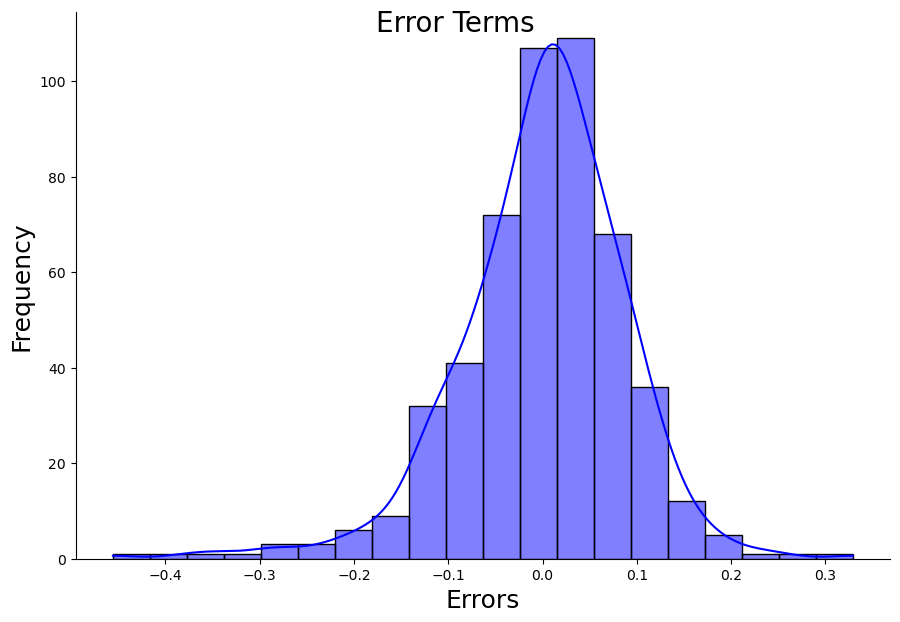

In [161]:
# Calculate errors
errors = y_train - y_train_cnt

# Plot the histogram of error terms using sns.displot
sns.displot(errors, bins=20, kde=True, color="blue", height=6, aspect=1.5)
plt.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)         # X-label
plt.ylabel('Frequency', fontsize=18)      # Y-label
plt.show()

## 13. Making Preddictions

#### Applying the scaling on the test sets

In [165]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist_cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [167]:
df_test.shape

(219, 30)

#### Dividing into X_test and y_test

In [169]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Execute the model to make predictions

In [171]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

## 14. Model Evaluation

Text(0, 0.5, 'y_pred')

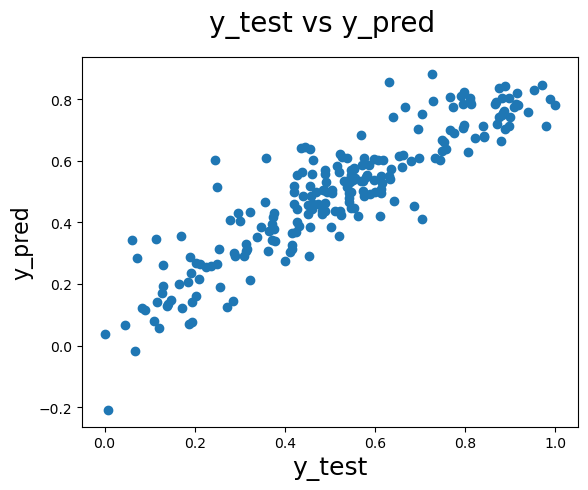

In [173]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## 15. R^2 Value for TEST

In [178]:
r2_score(y_test, y_pred)

0.804744945798995

## 16. Adjusted R^2 Value for TEST

In [185]:
# We already have the value of R^2 (calculated in above step)
r2=0.804744945798995

In [183]:
# Get the shape of X_test
X_test.shape

(219, 29)

In [189]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)
adjusted_r2

0.7747851755776768

## Comparing R^2 and Adjusted R^2 value for training (model) and test data set.

#### Training / Model R-squared:	0.845
#### Training / Model Adj. R-squared: 0.840

#### Test R-squared:	0.805
#### Test Adj. R-squared: 0.775

#### Both sets of values are close and there is no significant drop in values for Test data. This implies that there is no overfitting.

## 17. Validating the Assumptions for Linear Regression

### 17.1 Error terms are independent of each other

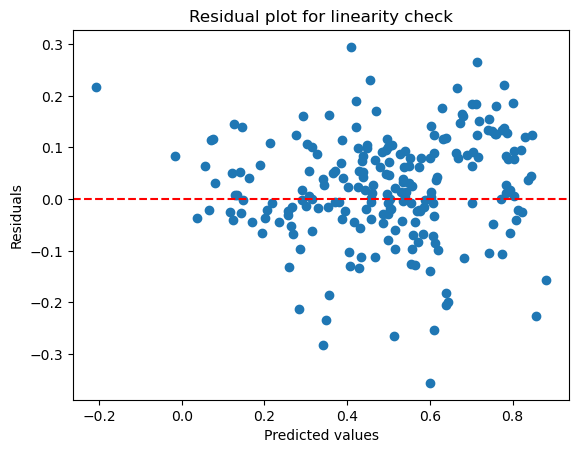

In [195]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for linearity check")
plt.show()

#### Since there is no visible pattern that means error terms are independent of each other.

### 17.2 Normality of Errors - Error terms are normally distributed with mean zero

In [204]:
y_train_cnt = lm.predict(X_train_rfe)

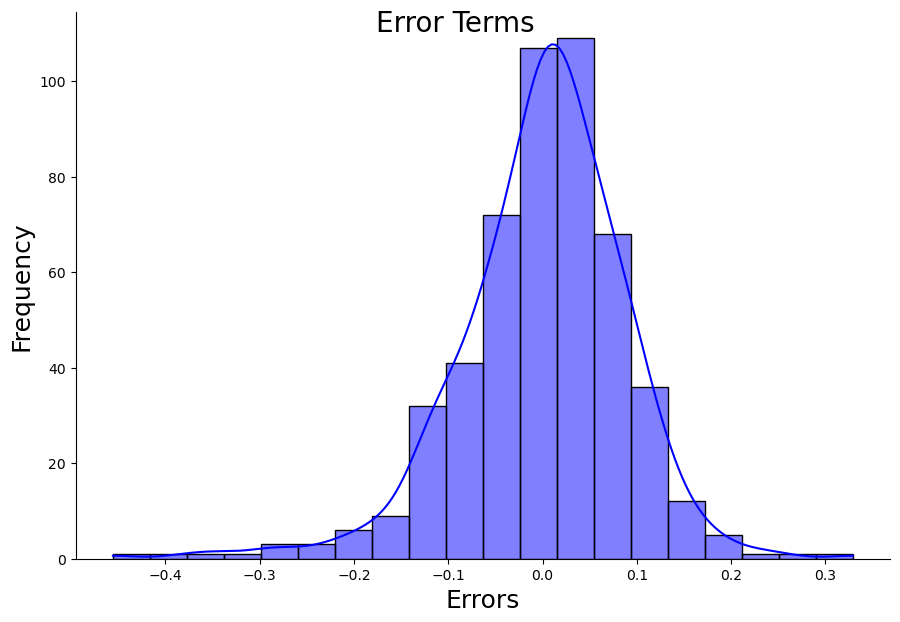

In [206]:
# Calculate errors
errors = y_train - y_train_cnt

# Plot the histogram of error terms using sns.displot
sns.displot(errors, bins=20, kde=True, color="blue", height=6, aspect=1.5)
plt.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)         # X-label
plt.ylabel('Frequency', fontsize=18)      # Y-label
plt.show()

#### Above graph clearly shows that error terms are normally distributed with mean zero

### 17.3 Homoscedasticity - Error terms have constant variance

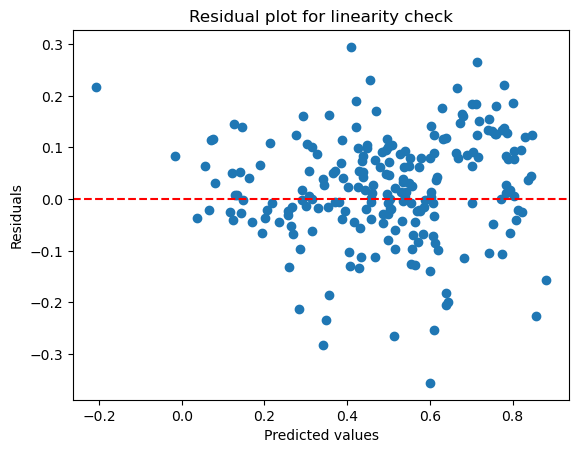

In [209]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for linearity check")
plt.show()

#### As can be seen above the variance is not following any pattern as the error terms change.

### 17.4 Linearity - There is a linear relationship between X and Y

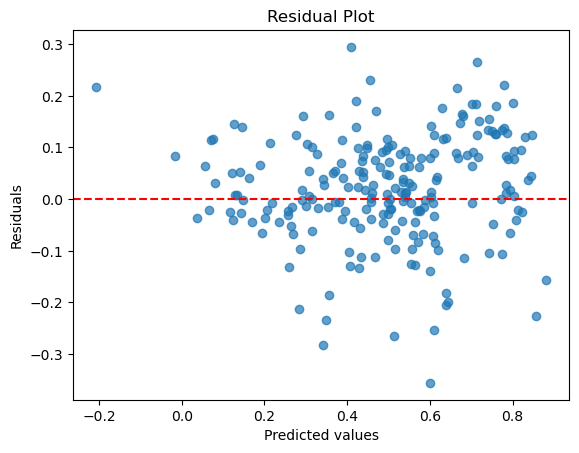

In [246]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#### Residuals are randomly scattered around zero, it implies linearity because the linear regression model assumes that 
#### the relationship between the independent variables and the dependent variable is linear.

## 18. Observations and Inferences from the Model

### **Overall -**
#### **1.)** The model explains a large portion of the variance in cnt (good fit).
#### **2.)** Most predictors are statistically significant and align with expectations:
#### ------ Positive effects :: yr, workingday, temp, season_winter, etc.
#### ------ Negative effects :: windspeed, season_spring, adverse weather conditions, etc.
#### **3.)** No major issues with autocorrelation or multicollinearity.

### **Model Fit Metrics ----**
#### **1.)** R-squared (0.845):
#### Indicates that 84.5% of the variance in the dependent variable (cnt) is explained by the independent variables in the model.
#### **2.)** Adjusted R-squared (0.840): 
#### Adjusted for the number of predictors; slightly lower than R squared to account for model complexity, still indicates a good fit
#### **3.)** F-statistic (179.7) and Prob (F-statistic): 
#### A very small pp-value (5.71e−1895.71e−189) indicates that the overall model is statistically significant.

### **Coefficients and Their Interpretations**
#### **1.)** Intercept (const): 0.1999
#### When all predictors are 0, the expected value of cnt is 0.1999.
#### It is Significant (p<0.05).
#### **2.)** yr (Year): 0.2346
#### A 1-unit increase in yr increases cnt by 23.46%. As the time passes the count of bike booking will increase year on year.
#### Thus year is a strongly significant independent variable.
#### **3.)** workingday: 0.0548
#### On working days, the count increases by 5.48%, holding other factors constant.
#### **4.)** temp: 0.4344
#### A unit increase in temperature is associated with a 43.44% increase in cnt.
#### This is highly significant.
#### **5.)** windspeed: −0.1610
#### A unit increase in wind speed reduces cnt by 16.10%.
#### This is also strognly significant.
#### **6.)** Season Variables:
#### Spring (season_spring): −0.0717 (negative impact, significant).
#### Summer (season_summer): 0.0338 (positive impact, significant).
#### Winter (season_winter): 0.0919 (positive impact, significant).
#### **7.)** Weather Conditions:
#### Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (weathersit_light_snow): −0.2980
#### Strongly reduces cnt by 29.80%.
#### Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (weathersit_mist_cloudy): −0.0831
#### Reduces cnt by 8.31%.